In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("framingham.csv")
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Most of our features are already numeric, binary, or easy-to-interpret continuous values, so you don’t need to spend days on complicated feature engineering.😅

In [50]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [51]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].median(), inplace=True)





C:\Users\amiya\AppData\Local\Temp\ipykernel_25700\1430461087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
C:\Users\amiya\AppData\Local\Temp\ipykernel_25700\1430461087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [52]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [53]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017205,0.197596,0.315630,-0.051545,-0.004546,0.005313,0.015708,-0.069549,-0.035989,0.057933,0.081653,-0.116621,0.010073,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.101258,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.007618,-0.010365,-0.035150,-0.081021,-0.038136,-0.022364,-0.128273,-0.061719,-0.135501,-0.053683,-0.033982,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.044295,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.007618,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.036150,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863,0.058859
BPMeds,-0.051545,0.120955,-0.010365,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.051394,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124,0.086417
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.006949,0.000123,0.057009,0.045190,0.024265,-0.017674,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.077808,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.036150,0.051394,0.006949,0.077808,1.000000,0.040117,0.111283,0.050329,0.086025,0.048996,0.606493,0.097317
totChol,-0.069549,0.260105,-0.022364,-0.046466,-0.026976,0.078578,0.000123,0.163054,0.040117,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559,0.081566


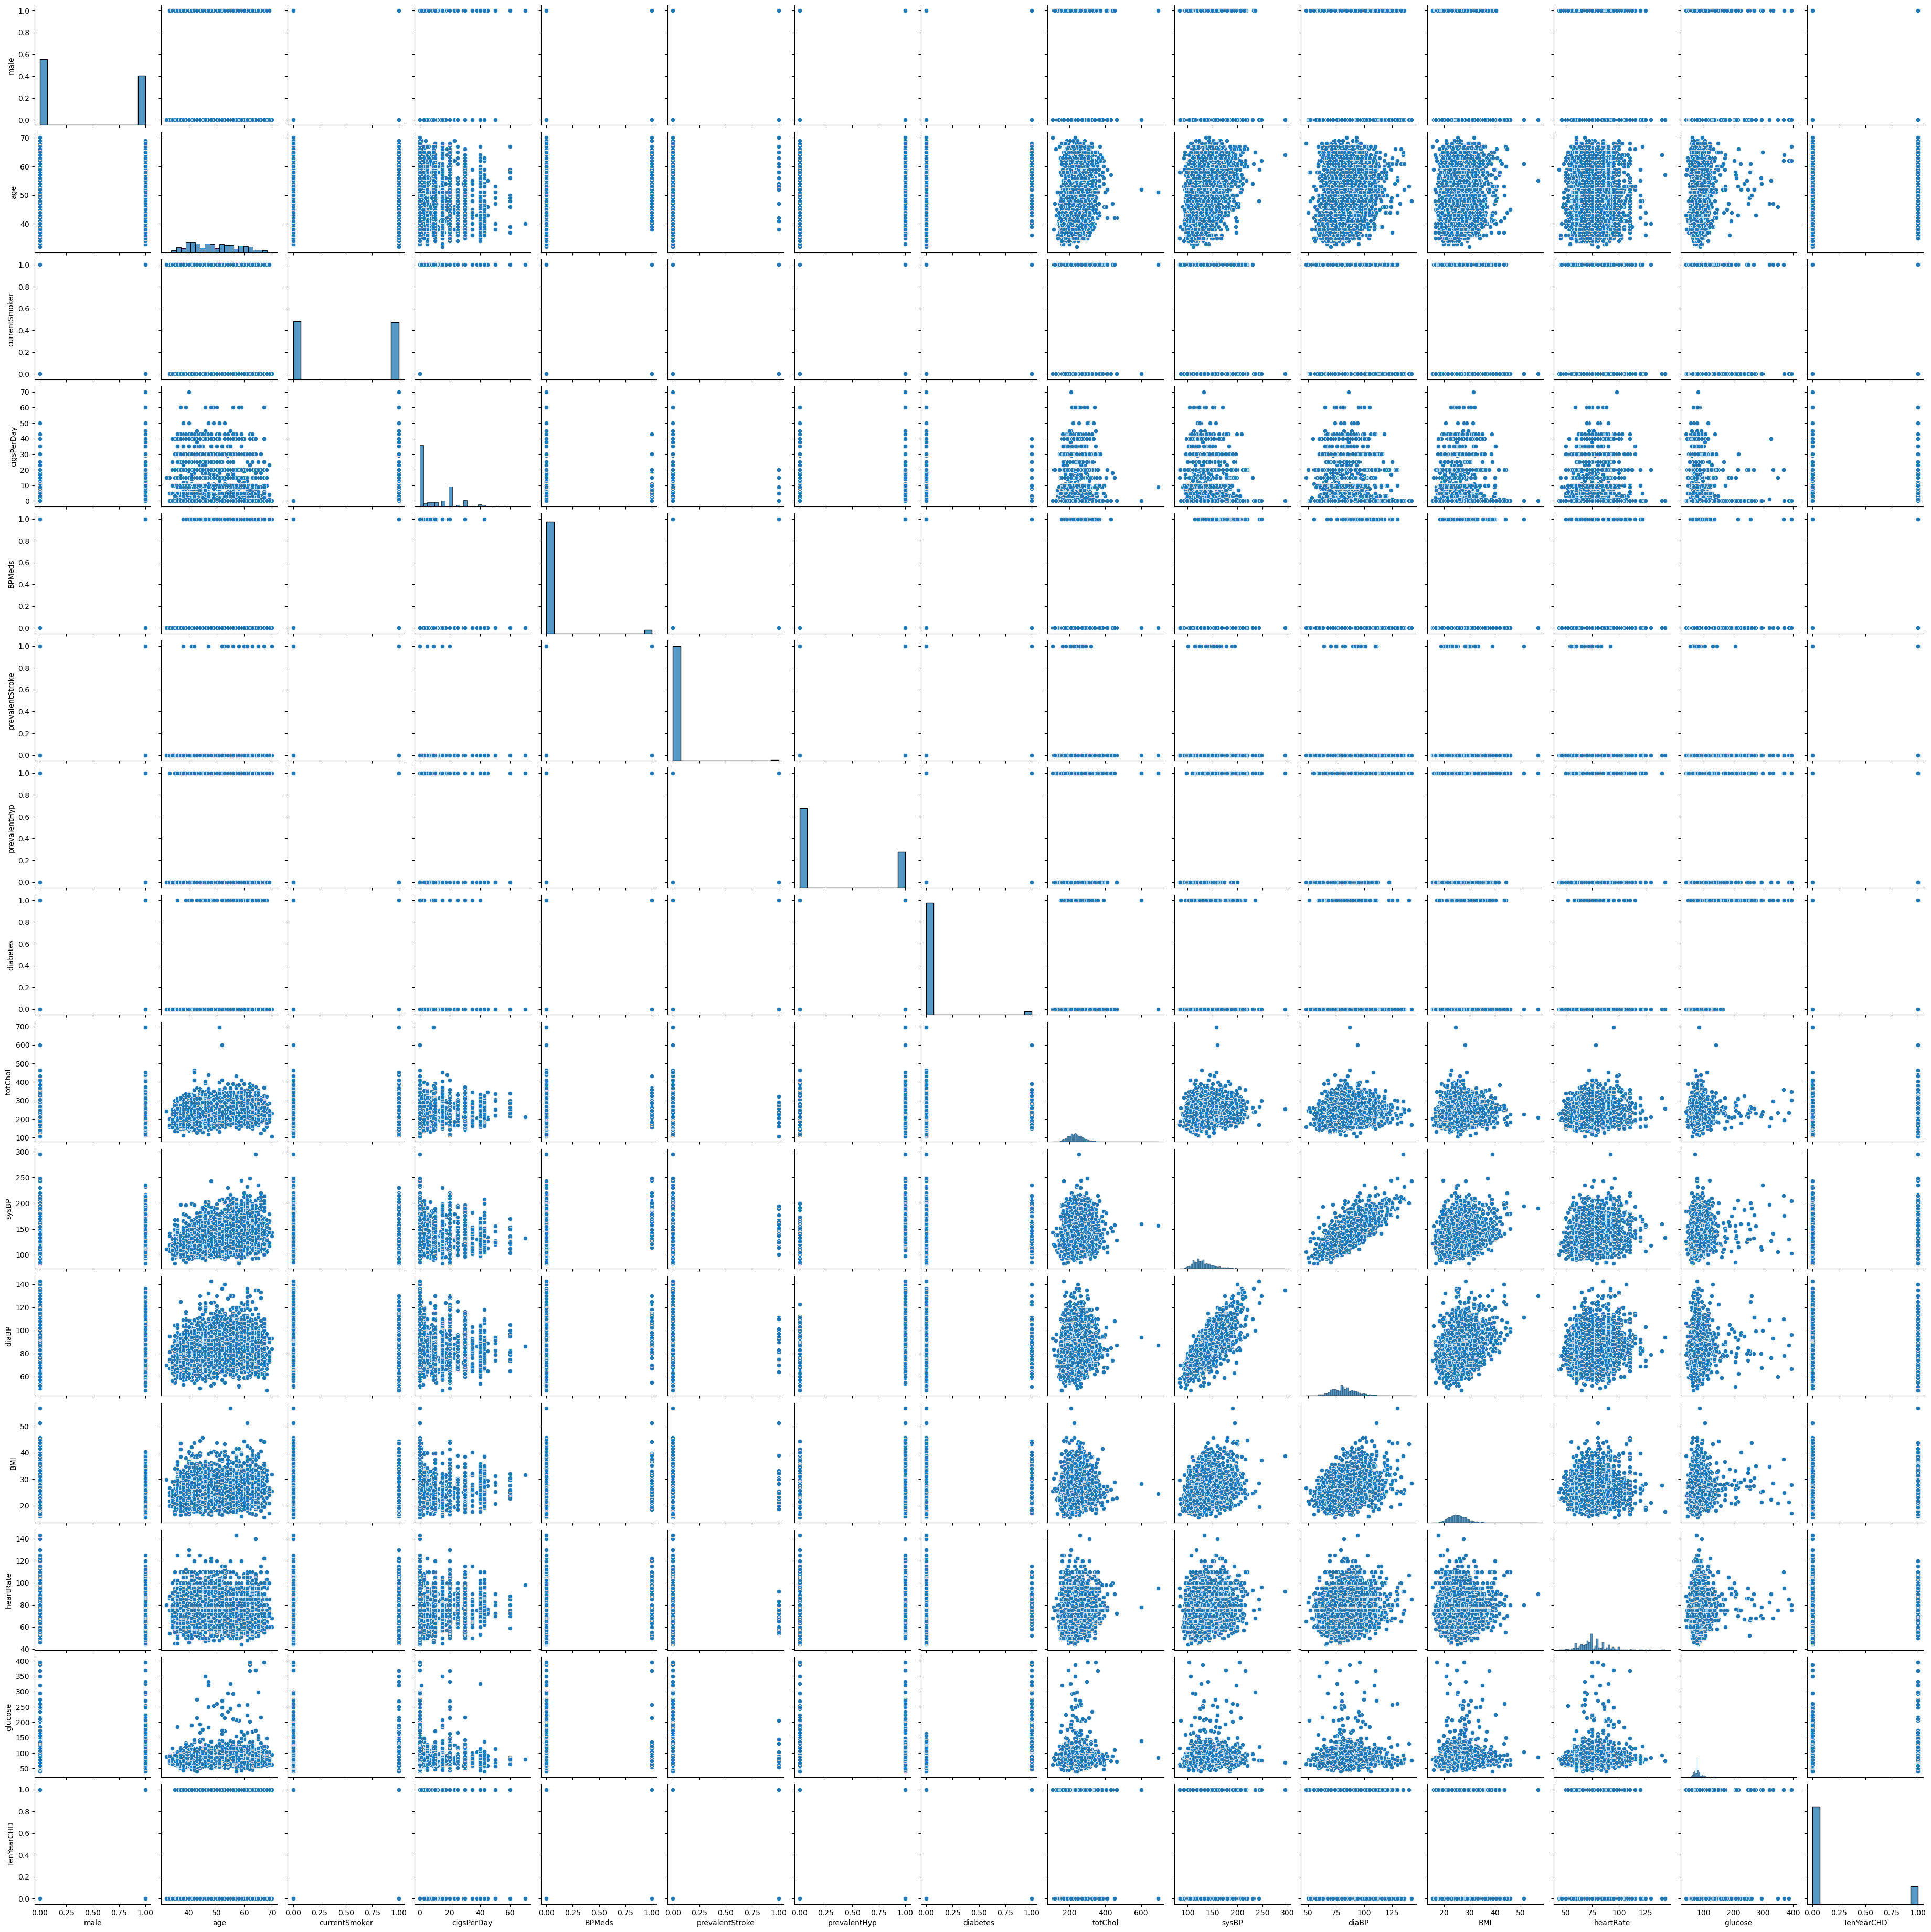

In [61]:
sns.pairplot(df)

<Axes: xlabel='currentSmoker', ylabel='count'>

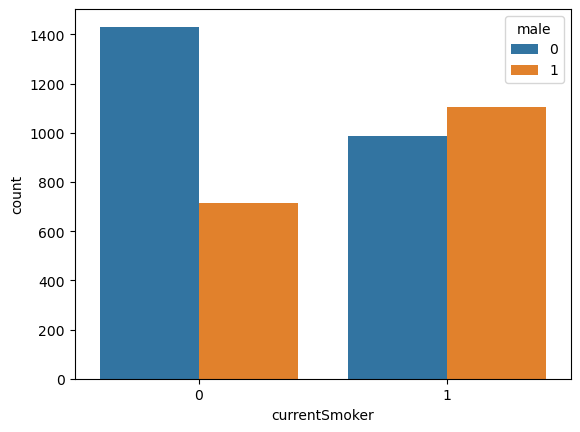

In [54]:
sns.countplot(x="currentSmoker", hue="male", data=df)

<Axes: >

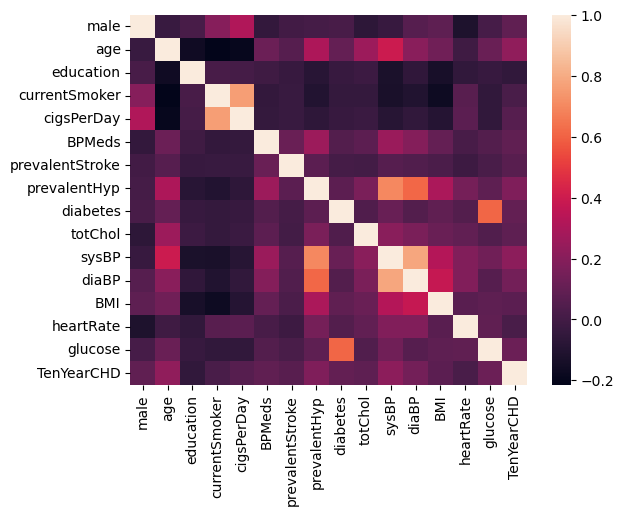

In [55]:
sns.heatmap(df.corr())

<Axes: xlabel='TenYearCHD', ylabel='count'>

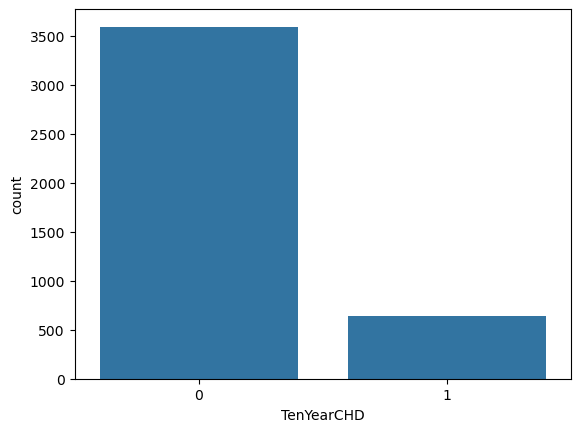

In [56]:
sns.countplot(x="TenYearCHD", data=df)


<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

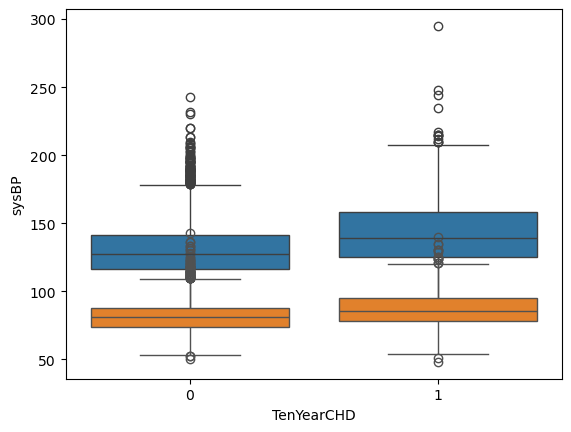

In [57]:
sns.boxplot(x="TenYearCHD", y="sysBP", data=df)
sns.boxplot(x="TenYearCHD", y="diaBP", data=df)


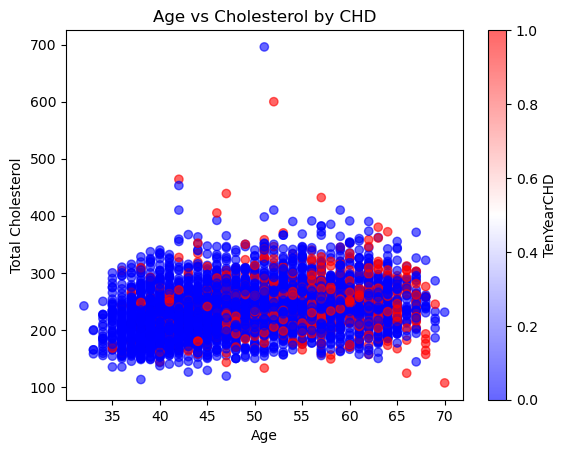

In [58]:
plt.scatter(df['age'], df['totChol'], c=df['TenYearCHD'], cmap='bwr', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Total Cholesterol")
plt.title("Age vs Cholesterol by CHD")
plt.colorbar(label="TenYearCHD")
plt.show()


In [59]:
df.drop('education', axis=1, inplace=True)

In [60]:
df.to_csv("heart_update.csv")